In [1]:
import sys
sys.path.append('/Users/gbibim/Here/hpt')

# List all modules and packages available at this path
import os
print(os.listdir('/Users/gbibim/Here/hpt'))


from hpt import utils
from hpt import plotting

#import mplhep as hep
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import mplhep as hep
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.metrics import auc, roc_curve

import hist

formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))
plt.rcParams.update({"font.size": 12})
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["grid.color"] = "#CCCCCC"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["figure.edgecolor"] = "none"

# automatically reloads imported files on edits
%load_ext autoreload
%autoreload 2

['pT_xjj0p9_newweight.png', 'PT_xbb0p95_reweighted.png', 'output_xbb0p7.png', 'outparquet', 'output_xbb0p95.png', '.DS_Store', '0-1.parquet', 'ROC_curves.ipynb', 'LICENSE', 'requirements.txt', 'mSDstacks_xbb_tw_xcs_rocs_Dec92024.pdf', 'ZJets.ipynb', 'mSD_xjj0p9_newweight.png', 'output_xjj0p7.png', 'Discriminators.ipynb', 'pyproject.toml', 'mSD_xbb0p9_reweighted.png', 'mSD_xbb0p95_reweighted.png', '.sites_map.json', 'output_xbb0p95_nokfactor.png', 'PT_xjj0p9_reweighted.png', 'mSD_xbb0p7_reweighted.png', 'README.md', 'output_xbb0p7_nokfactor.png', 'output_xbb0p95_kfactor.png', 'output_xjj0p7_nokfactor.png', '.gitignore', 'output_xjj0p95.png', 'output_xjj0p9.png', 'print_parquet.py', 'outfiles', 'mSD_xjj0p9_reweighted.png', 'PT_xbb0p7_reweighted.png', '.git', 'data', 'output_xjj0p95_nokfactor.png', 'PT_xbb0p9_reweighted.png', 'output_xbb0p9.png', 'HiggsDiscriminators.ipynb', 'mSDplot.ipynb', 'output_xbb0p9_nokfactor.png', 'src']


In [2]:
MAIN_DIR = "/Users/gbibim/Here/genZ/data"
#dir_name = "children" #"new"  # data for older samples new for the files with lhe variables
dir_name = "PNetchildren" 
path_to_dir = f"{MAIN_DIR}/{dir_name}/"
year = "2023"  

# Define the samples and the directories where they are stored
samples = {
    "Zto2Q": [
        "Zto2Q-2Jets_PTQQ-100to200_1J",
        "Zto2Q-2Jets_PTQQ-100to200_2J",
        "Zto2Q-2Jets_PTQQ-200to400_1J",
        "Zto2Q-2Jets_PTQQ-200to400_2J",
        "Zto2Q-2Jets_PTQQ-400to600_1J",
        "Zto2Q-2Jets_PTQQ-400to600_2J",
        "Zto2Q-2Jets_PTQQ-600_1J",
        "Zto2Q-2Jets_PTQQ-600_2J",
        ],
    
    
    "Wto2Q":[
        "Wto2Q-2Jets_PTQQ-100to200_1J",
        "Wto2Q-2Jets_PTQQ-100to200_2J",
        "Wto2Q-2Jets_PTQQ-200to400_1J",
        "Wto2Q-2Jets_PTQQ-200to400_2J",
        "Wto2Q-2Jets_PTQQ-400to600_1J",
        "Wto2Q-2Jets_PTQQ-400to600_2J",
        "Wto2Q-2Jets_PTQQ-600_1J",
        "Wto2Q-2Jets_PTQQ-600_2J",
        ],
        
    "Diboson": {
        "ZZ",
        "WZ",
        "WW",
        "WWto4Q",       
    },

    "TT": {
        "TTto4Q",
        "TTto2L2Nu",
        "TTtoLNu2Q",
    },

    "QCD": {
        "QCD_HT-40to70",
        "QCD_HT-70to100",
        "QCD_HT-100to200",
        "QCD_HT-200to400",
        "QCD_HT-400to600",
        "QCD_HT-600to800",
        "QCD_HT-800to1000",
        "QCD_HT-1000to1200",
        "QCD_HT-1200to1500",
        "QCD_HT-1500to2000",
    },

    "data": {
        "JetMET_Run2023Cv1",
        "JetMET_Run2023Cv2",
        "JetMET_Run2023Cv3",
        "JetMET_Run2023Cv4",
    },
    "ggH": {
        "GluGluHto2B_M-125",
    },
    "WH": {
        "WminusH_Hto2B_Wto2Q_M-125",
        "WminusH_Hto2B_WtoLNu_M-125",
        "WplusH_Hto2B_Wto2Q_M-125",
        "WplusH_Hto2B_WtoLNu_M-125",
    },
    "ZH": {
        "ZH_Hto2B_Zto2Q_M-125",
        "ZH_Hto2B_Zto2L_M-125",
        "ZH_Hto2B_Zto2Nu_M-125",
        "ggZH_Hto2B_Zto2L_M-125",
        "ggZH_Hto2B_Zto2Q_M-125",
        "ggZH_Hto2B_Zto2Nu_M-125",
    },
    "ttH": {    
        "ttHto2B_M-125",
    },

    "VBF": {
        "VBFHto2B_M-125",
    },
    "higgs": {
        "GluGluHto2B_M-125",
        "WminusH_Hto2B_Wto2Q_M-125",
        "WminusH_Hto2B_WtoLNu_M-125",
        "WplusH_Hto2B_Wto2Q_M-125",
        "WplusH_Hto2B_WtoLNu_M-125",
        "ZH_Hto2B_Zto2Q_M-125",
        "ZH_Hto2B_Zto2L_M-125",
        "ZH_Hto2B_Zto2Nu_M-125",
        "ggZH_Hto2B_Zto2L_M-125",
        "ggZH_Hto2B_Zto2Q_M-125",
        "ggZH_Hto2B_Zto2Nu_M-125",
        "ttHto2B_M-125",
        "VBFHto2B_M-125",
    },
  
}

dirs = {path_to_dir: samples}

load_columns = [
    ("weight", 1),
    #("GenVPt", 1),
    ("ak8FatJetPt", 1),
    ("ak8FatJetmsoftdrop", 1),
    ("ak8FatJetPNetMass", 1),
    #("ak8FatJetPNetTXbb", 2),
    #("ak8FatJetPNetTXjj", 2),
    #("ak8FatJetPNetTXcc", 2),
    #("ak8FatJetPNetQCD", 2),
    #("ak8FatJetPNetTXgg", 2),
    ('ak8FatJetParTPQCD1HF', 1),
    ('ak8FatJetParTPQCD2HF', 1),
    ('ak8FatJetParTPQCD0HF', 1),
    ('ak8FatJetParTPXbb', 1),
    #('ak8FatJetParTPXcc', 1),
    ('ak8FatJetParTPXcs', 1),
    #('ak8FatJetParTPXgg', 1),
    ('ak8FatJetParTPXqq', 1),
]

load_V = load_columns + [
    ("bbFatJetVMatch", 1),
    ("GenVis_bb", 1),
    ("GenVis_cs", 1),
    ("bbFatJetNumQMatchedV1", 1)
    ]
load_H = load_columns + [
    ("bbFatJetHiggsMatch", 1),
    ("bbFatJetNumBMatchedH1", 1),
    ]
    


In [3]:
signal = "Wto2Q"
background = "QCD"
jet_collection = "ak8FatJet"
discriminator_name = "ParTTW"
discriminator = f"{jet_collection}{discriminator_name}"
pt_cut = [200, 1000]
msd_cut = [40, 200]
mreg_cut = None
match = True
jet_index = 0

events_dict = {
    signal: {},
    background: {},
}
#events_dict[signal] = {}
for which in [signal, background]:
    events_dict[which] = {}
    for input_dir, dirs_samples in dirs.items():
            # Loop through each sample individually to avoid loading everything at once
        for sample in samples[which]:
            try:
                # Load only one sample at a time
                events_dict[which] = {
                    **events_dict[which],
                    **utils.load_samples(
                        input_dir,
                        which,
                        [sample],  # List containing a single sample
                        year,
                        columns=utils.format_columns(
                            load_V if which in {"Zto2Q", "Wto2Q"} else load_H if which=="higgs" else load_columns
                        ),
                    )
                }

            except KeyError as e:
                print(f"Warning: Missing key {e} in sample {sample}. Skipping.")


sample_name Wto2Q-2Jets_PTQQ-100to200_1J
Loading Wto2Q-2Jets_PTQQ-100to200_1J
Loaded Wto2Q-2Jets_PTQQ-100to200_1J                      : 6149 entries
sample_name Wto2Q-2Jets_PTQQ-100to200_2J
Loading Wto2Q-2Jets_PTQQ-100to200_2J
Loaded Wto2Q-2Jets_PTQQ-100to200_2J                      : 1575923 entries
sample_name Wto2Q-2Jets_PTQQ-200to400_1J
Loading Wto2Q-2Jets_PTQQ-200to400_1J
Loaded Wto2Q-2Jets_PTQQ-200to400_1J                      : 3219709 entries
sample_name Wto2Q-2Jets_PTQQ-200to400_2J
Loading Wto2Q-2Jets_PTQQ-200to400_2J
Loaded Wto2Q-2Jets_PTQQ-200to400_2J                      : 11814864 entries
sample_name Wto2Q-2Jets_PTQQ-400to600_1J
Loading Wto2Q-2Jets_PTQQ-400to600_1J
Loaded Wto2Q-2Jets_PTQQ-400to600_1J                      : 785415 entries
sample_name Wto2Q-2Jets_PTQQ-400to600_2J
Loading Wto2Q-2Jets_PTQQ-400to600_2J
Loaded Wto2Q-2Jets_PTQQ-400to600_2J                      : 3074382 entries
sample_name Wto2Q-2Jets_PTQQ-600_1J
Loading Wto2Q-2Jets_PTQQ-600_1J
Loaded Wto2Q-2Jet

/Users/gbibim/Here/hpt/src/hpt/utils.py:205: UserWarning: No valid events loaded for sample QCD_HT-40to70.
  warnings.warn(f"No valid events loaded for sample {sample_name}.", stacklevel=1)


Loaded QCD_HT-1200to1500                                 : 39452675 entries
sample_name QCD_HT-1000to1200
Loading QCD_HT-1000to1200
Loaded QCD_HT-1000to1200                                 : 28209931 entries
sample_name QCD_HT-70to100
sample_name QCD_HT-200to400
Loading QCD_HT-200to400
Loaded QCD_HT-200to400                                   : 565 entries


/Users/gbibim/Here/hpt/src/hpt/utils.py:205: UserWarning: No valid events loaded for sample QCD_HT-70to100.
  warnings.warn(f"No valid events loaded for sample {sample_name}.", stacklevel=1)


In [4]:
def get_roc_inputs(
    events_dict,
    jet_collection,
    discriminator_name,
    jet_index,
    match,
):
    sig_key = signal
    bg_keys = [background]
    discriminator = f"{jet_collection}{discriminator_name}"


    # 1 for signal, 0 for background
    y_true = np.concatenate(
        [
            np.ones(len(events_dict[sig_key])),
            #np.ones(len(signal_events_filtered)),
            np.zeros(sum(len(events_dict[bg_key]) for bg_key in bg_keys)),
        ]
    )
    # weights
    weights = np.concatenate(
        [events_dict[sig_key]["finalWeight"]]
        + [events_dict[bg_key]["finalWeight"] for bg_key in bg_keys],
        #[np.ones(len(signal_events_filtered)),
        #np.ones(sum(len(events_dict[bg_key]) for bg_key in bg_keys))]
        #[signal_events_filtered["finalWeight"]]
    )
    # discriminator
    scores = np.concatenate(
        #[events_dict[sig_key][discriminator][jet_index]]
        #+ [events_dict[bg_key][discriminator][jet_index] for bg_key in bg_keys],
        [events_dict[sig_key][discriminator]]
        + [events_dict[bg_key][discriminator] for bg_key in bg_keys],

        #[events_dict[sig_key][discriminator]]
    )

    # Check for NaN or Inf values in scores
    if np.any(np.isnan(scores)) or np.any(np.isinf(scores)):
        print("NaN or Infinite values found in discriminator scores.")
        
        
        # Identify problematic entries in the background
        #for bg_key in bg_keys:
        #    nan_inf_indices_bg = np.isnan(events_dict[bg_key][discriminator]) | np.isinf(events_dict[bg_key][discriminator])
        #    problematic_bg = events_dict[bg_key][nan_inf_indices_bg]
        #    print(f"Background ({bg_key}) jets with NaN or Inf:")
        #    print(f"  pT: {problematic_bg[f'{jet_collection}Pt'][:, jet_index]}")
        #    print(f"  mSD: {problematic_bg[f'{jet_collection}msoftdrop'][:, jet_index]}")


    # Check for NaN or Inf values in scores
    if np.any(np.isnan(scores)):
        print("NaN values found in scores.")
    if np.any(np.isinf(scores)):
        print("Infinite values found in scores.")

    # Deal with NaN and Inf values
    #scores = np.nan_to_num(scores, nan=0.0)  # Replace NaN with 0

    #OR
    # Check for NaNs or Inf values in scores
    if np.any(np.isnan(scores)) or np.any(np.isinf(scores)):
        #Handle NaN or Inf by removing corresponding entries
        valid_indices = ~np.isnan(scores) & ~np.isinf(scores)
        scores = scores[valid_indices]
        y_true = y_true[valid_indices]  # Make sure y_true matches the valid scores
        weights = weights[valid_indices]  # If weights are involved

    return y_true, scores, weights


In [5]:
def get_roc(
    events_dict,
    jet_collection,
    discriminator_name,
    discriminator_label,
    discriminator_color,
    jet_indices,
    pt_cut,
    msd_cut,
    mreg_cut=None,
):
    y_true_arr = []
    scores_arr = []
    weights_arr = []
    for jet_index in jet_indices:
        events_dict_masked = {
            key: events[
                (events[f"{jet_collection}Pt"][jet_index] >= pt_cut[0])
                & (events[f"{jet_collection}Pt"][jet_index] <= pt_cut[1])
                & (events[f"{jet_collection}msoftdrop"][jet_index] >= msd_cut[0])
                & (events[f"{jet_collection}msoftdrop"][jet_index] <= msd_cut[1])
            ]
            for key, events in events_dict.items()
        }
        if mreg_cut:
            events_dict_masked = {
                key: events[
                    (events[f"{jet_collection}PNetMassLegacy"][jet_index] >= mreg_cut[0])
                    & (events[f"{jet_collection}PNetMassLegacy"][jet_index] <= mreg_cut[1])
                ]
                for key, events in events_dict.items()
            }
        y_true_i, scores_i, weights_i = get_roc_inputs(
            events_dict_masked, jet_collection, discriminator_name, jet_index, match
        )
        y_true_arr.append(y_true_i)
        scores_arr.append(scores_i)
        weights_arr.append(weights_i)
    y_true = np.concatenate(y_true_arr)
    scores = np.concatenate(scores_arr)
    weights = np.concatenate(weights_arr)
    fpr, tpr, thresholds = roc_curve(y_true, scores, sample_weight=weights)
    roc = {
        "fpr": fpr,
        "tpr": tpr,
        "thresholds": thresholds,  #is the cut on the discriminator
        "label": discriminator_label + f" AUC ({auc(fpr, tpr):.4f})",
        "color": discriminator_color,
    }

    return roc

In [6]:
# Assuming `data` is your dictionary containing Zto2Q and QCD samples
summed_data = {}

for category in [signal, 'QCD']:
    if category in events_dict:
        # Concatenate all DataFrames within the category
        summed_data[category] = pd.concat(events_dict[category].values(), ignore_index=True)

# Now, `summed_data['Zto2Q']` and `summed_data['QCD']` contain the combined DataFrames

events_dict = summed_data
del summed_data

In [7]:
# List of keys to remove
keys_to_remove = [
    "ak8FatJetParTPXbb",
    "ak8FatJetParTPXcs",
    "ak8FatJetParTPXqq",
    "ak8FatJetParTPQCD1HF",
    "ak8FatJetParTPQCD2HF",
    "ak8FatJetParTPQCD0HF",
]

#Txcs = Pxcs / (Pxcs + PQCD)
#TW = (Pxcs + Pxqq) / (Pxcs + Pxqq + PQCD + Pxgg + Pxbb + Pxcc)

if match:
    if signal == "higgs":
        signal_events_filtered = events_dict[signal][(events_dict[signal]["bbFatJetHiggsMatch"][0] == 1) & (events_dict[signal]["bbFatJetNumBMatchedH1"][0] == 2)]
    elif signal == "Zto2Q":
        signal_events_filtered = events_dict[signal][(events_dict[signal]["bbFatJetVMatch"][0] == 1) & (events_dict[signal]["GenVis_bb"][0] == 1) & (events_dict[signal]["bbFatJetNumQMatchedV1"][0] == 2)]
    elif signal == "Wto2Q":
        signal_events_filtered = events_dict[signal][(events_dict[signal]["bbFatJetVMatch"][0] == 1) & (events_dict[signal]["GenVis_cs"][0] == 1) & (events_dict[signal]["bbFatJetNumQMatchedV1"][0] == 2)]
else:
    signal_events_filtered = events_dict[signal]

events_dict = {
    signal: signal_events_filtered,
    background: events_dict[background],
}

del signal_events_filtered

for which in [signal, background]:
    if discriminator == "ak8FatJetParTTXbb":
        events_dict[which]["ak8FatJetParTTXbb"] = (  
            events_dict[which]["ak8FatJetParTPXbb"][0] / (
                events_dict[which]["ak8FatJetParTPXbb"][0]
                + events_dict[which]["ak8FatJetParTPQCD1HF"][0]
                + events_dict[which]["ak8FatJetParTPQCD2HF"][0]
                + events_dict[which]["ak8FatJetParTPQCD0HF"][0]
            )
        )

    if discriminator == "ak8FatJetParTTXcs":
        events_dict[which]["ak8FatJetParTTXcs"] = (
            events_dict[which]["ak8FatJetParTPXcs"][0] / (
                events_dict[which]["ak8FatJetParTPXcs"][0]
                + events_dict[which]["ak8FatJetParTPQCD1HF"][0]
                + events_dict[which]["ak8FatJetParTPQCD2HF"][0]
                + events_dict[which]["ak8FatJetParTPQCD0HF"][0]
            )
        )

    if discriminator == "ak8FatJetParTTW":
        events_dict[which]["ak8FatJetParTTW"] = (  
            (events_dict[which]["ak8FatJetParTPXcs"][0] 
            + events_dict[which]["ak8FatJetParTPXqq"][0]) / (
                events_dict[which]["ak8FatJetParTPXcs"][0]
                + events_dict[which]["ak8FatJetParTPXqq"][0]
                + events_dict[which]["ak8FatJetParTPQCD1HF"][0]
                + events_dict[which]["ak8FatJetParTPQCD2HF"][0]
                + events_dict[which]["ak8FatJetParTPQCD0HF"][0]
                + events_dict[which]["ak8FatJetParTPXbb"][0]
            )
        )

    
    # Remove unnecessary keys
    for key in keys_to_remove:
        del events_dict[which][key]  # Or use events_dict[which].pop(key) if you prefer

In [8]:
events_dict[signal].columns

MultiIndex([(               'weight',  0),
            (          'ak8FatJetPt',  0),
            (   'ak8FatJetmsoftdrop',  0),
            (    'ak8FatJetPNetMass',  0),
            (       'bbFatJetVMatch',  0),
            (            'GenVis_bb',  0),
            (            'GenVis_cs',  0),
            ('bbFatJetNumQMatchedV1',  0),
            (        'weight_nonorm', ''),
            (          'finalWeight', ''),
            (      'ak8FatJetParTTW', '')],
           )

In [9]:
plot_dir = f"{MAIN_DIR}/plots/{dir_name}/"
if not os.path.exists(plot_dir):
        os.makedirs(plot_dir)
num_jets = 1
jets = [[0]]
jet_coll_pnet = ""


cut_str = "pt" + "-".join(str(x) for x in pt_cut) + "msd" + "-".join(str(x) for x in msd_cut)
legtitle = (
    rf"{pt_cut[0]} < $p_T$ < {pt_cut[1]} GeV"
    + "\n"
    + f" {msd_cut[0]}"
    + r" < $m_{SD}$ <"
    + f" {msd_cut[1]} GeV"
)

for jet_indices in jets:
    rocs = {
        #"ParTTXbb": get_roc(
        #    events_dict,
        #    jet_collection,
        #    "ParTTXbb",
        #    "ParTv2 higgs vs QCD",
        #    "red",
        #    jet_indices,
        #    pt_cut,
        #    msd_cut,
        #    mreg_cut,
        #),
        #"ParTTXcs": get_roc(
        #    events_dict,
        #    jet_collection,
        #    "ParTTXcs",
        #    "ParTv2 Wto2Q vs QCD",
        #    "red",
        #    jet_indices,
        #    pt_cut,
       #     msd_cut,
        #    mreg_cut,
        #),
        "ParTTW": get_roc(
            events_dict,
            jet_collection,
            "ParTTW",
            "ParTv2TW Wto2Q vs QCD",
            "red",
            jet_indices,
            pt_cut,
            msd_cut,
            mreg_cut,
        ),
    }




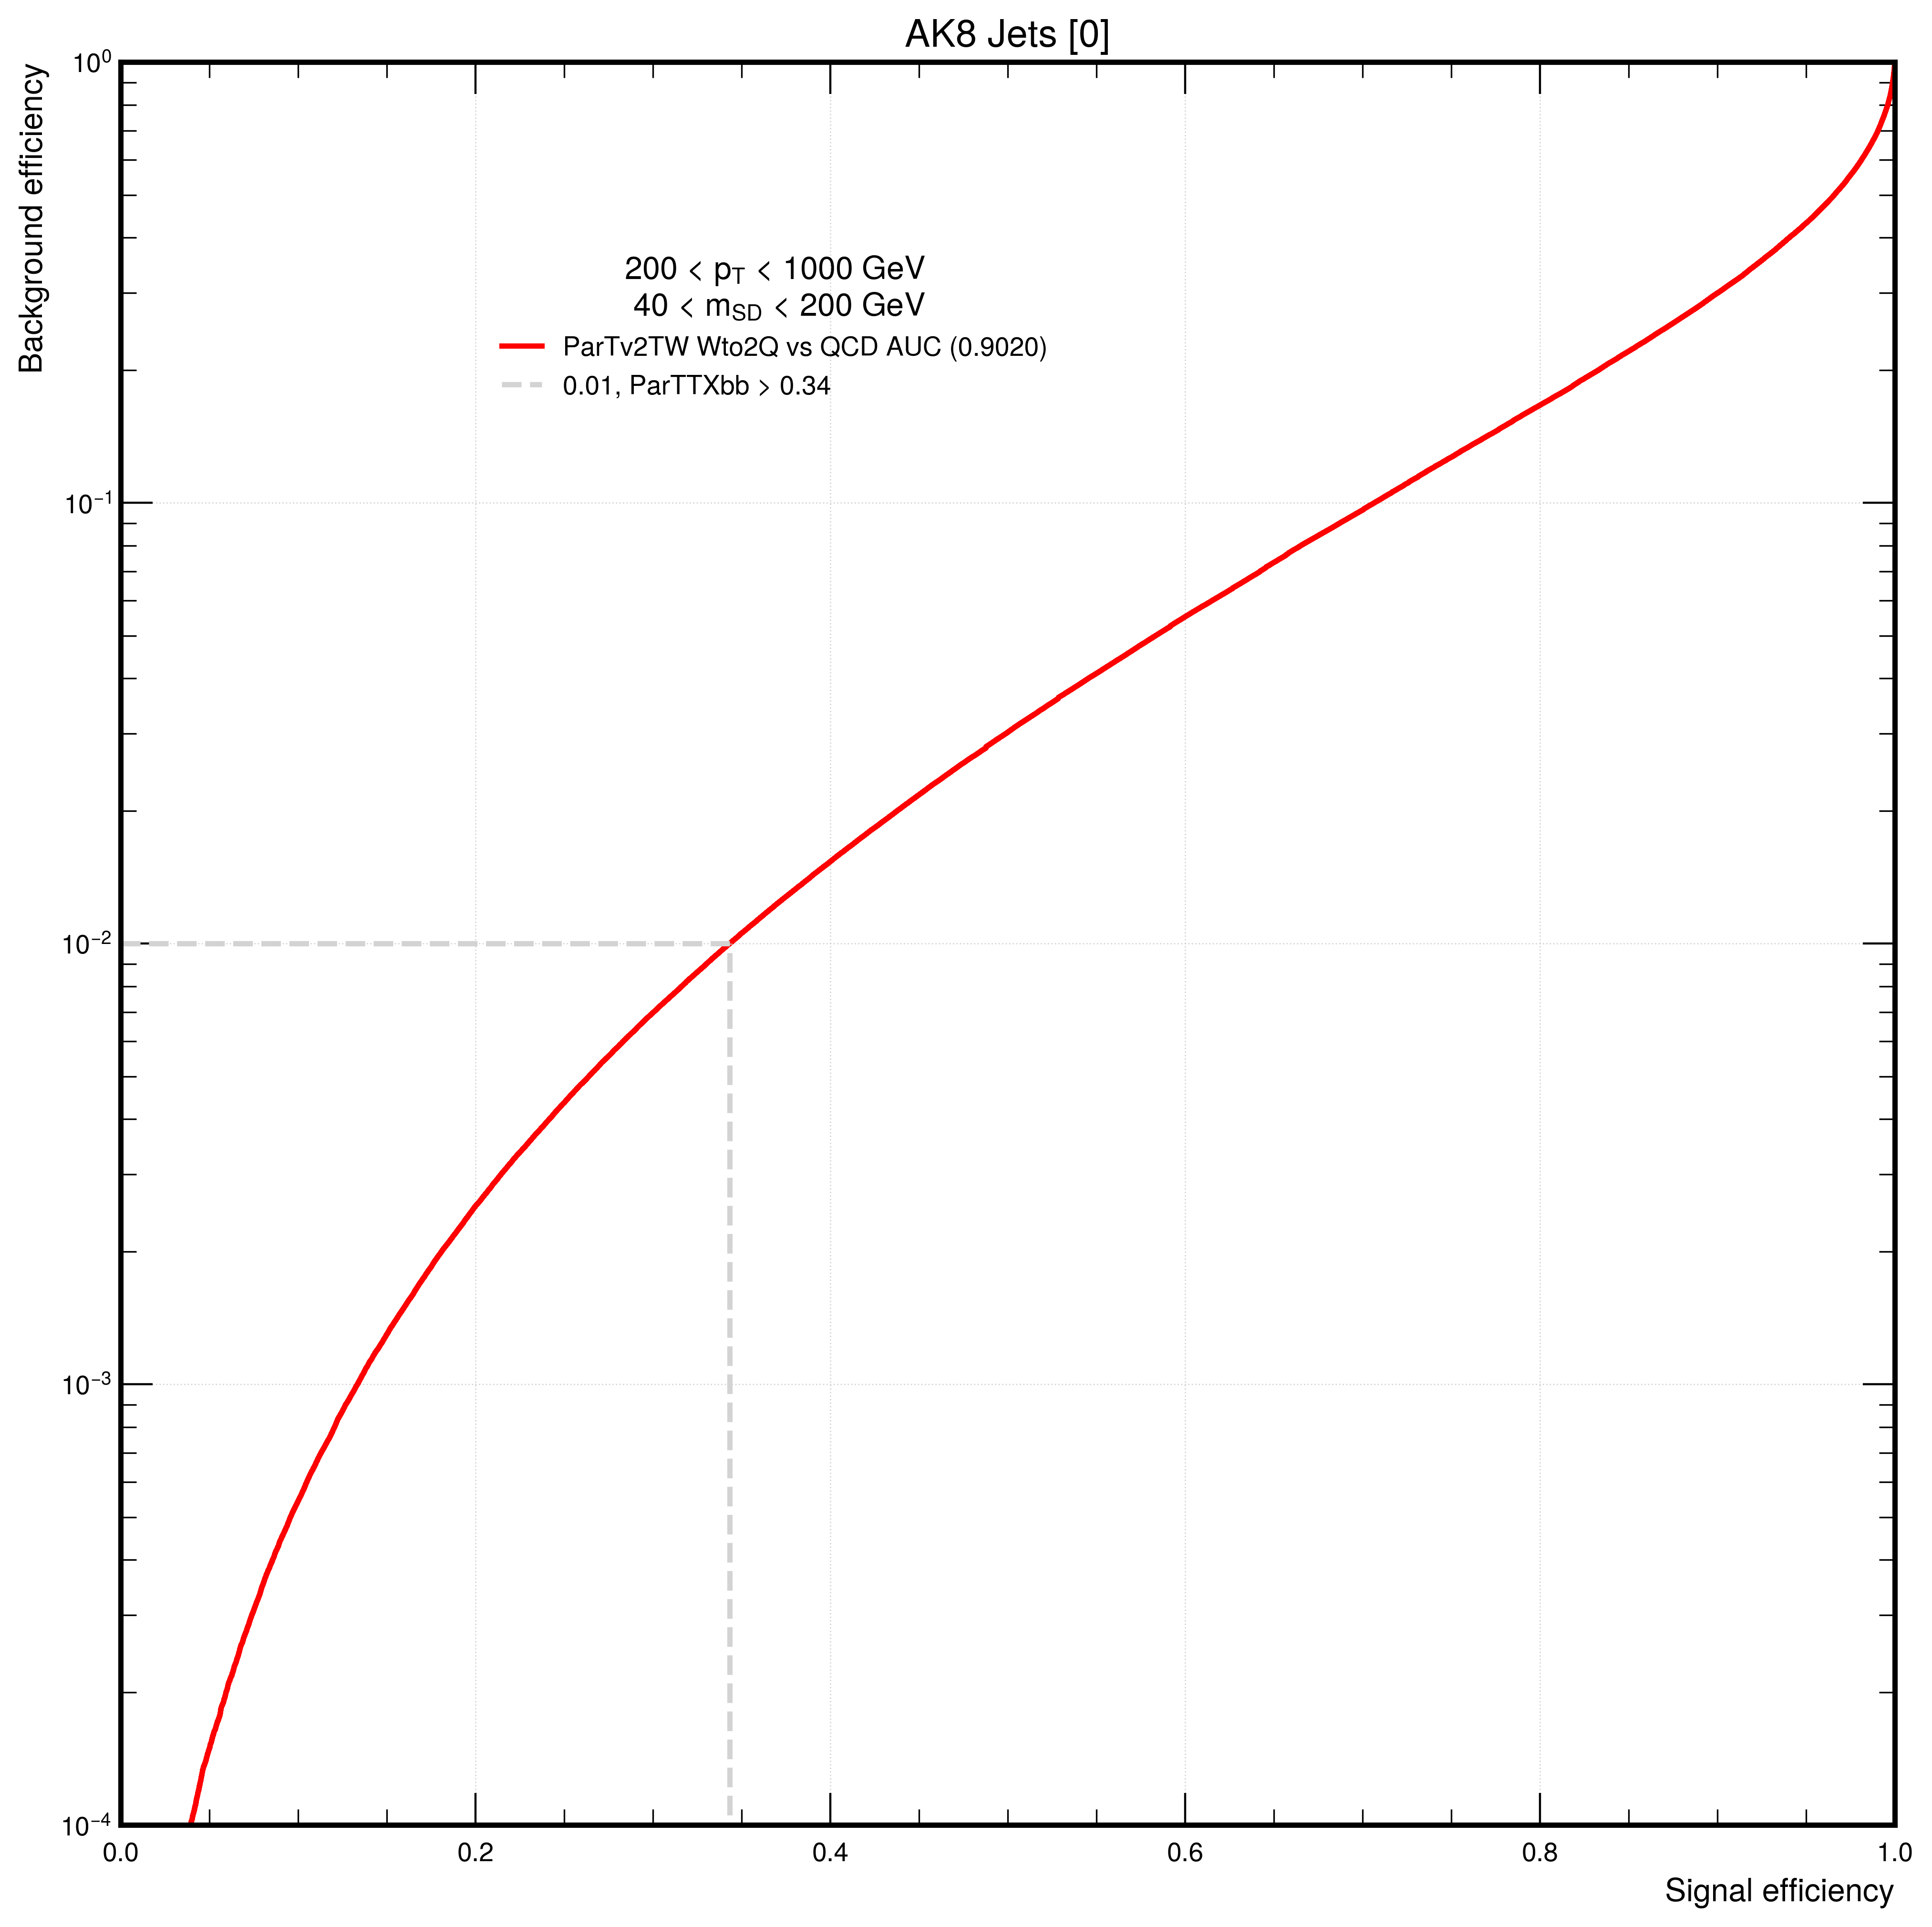

/var/folders/5l/g72gr7pn1qjfpv9ts3r8m3x80000gn/T/ipykernel_59013/2644270457.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper left")


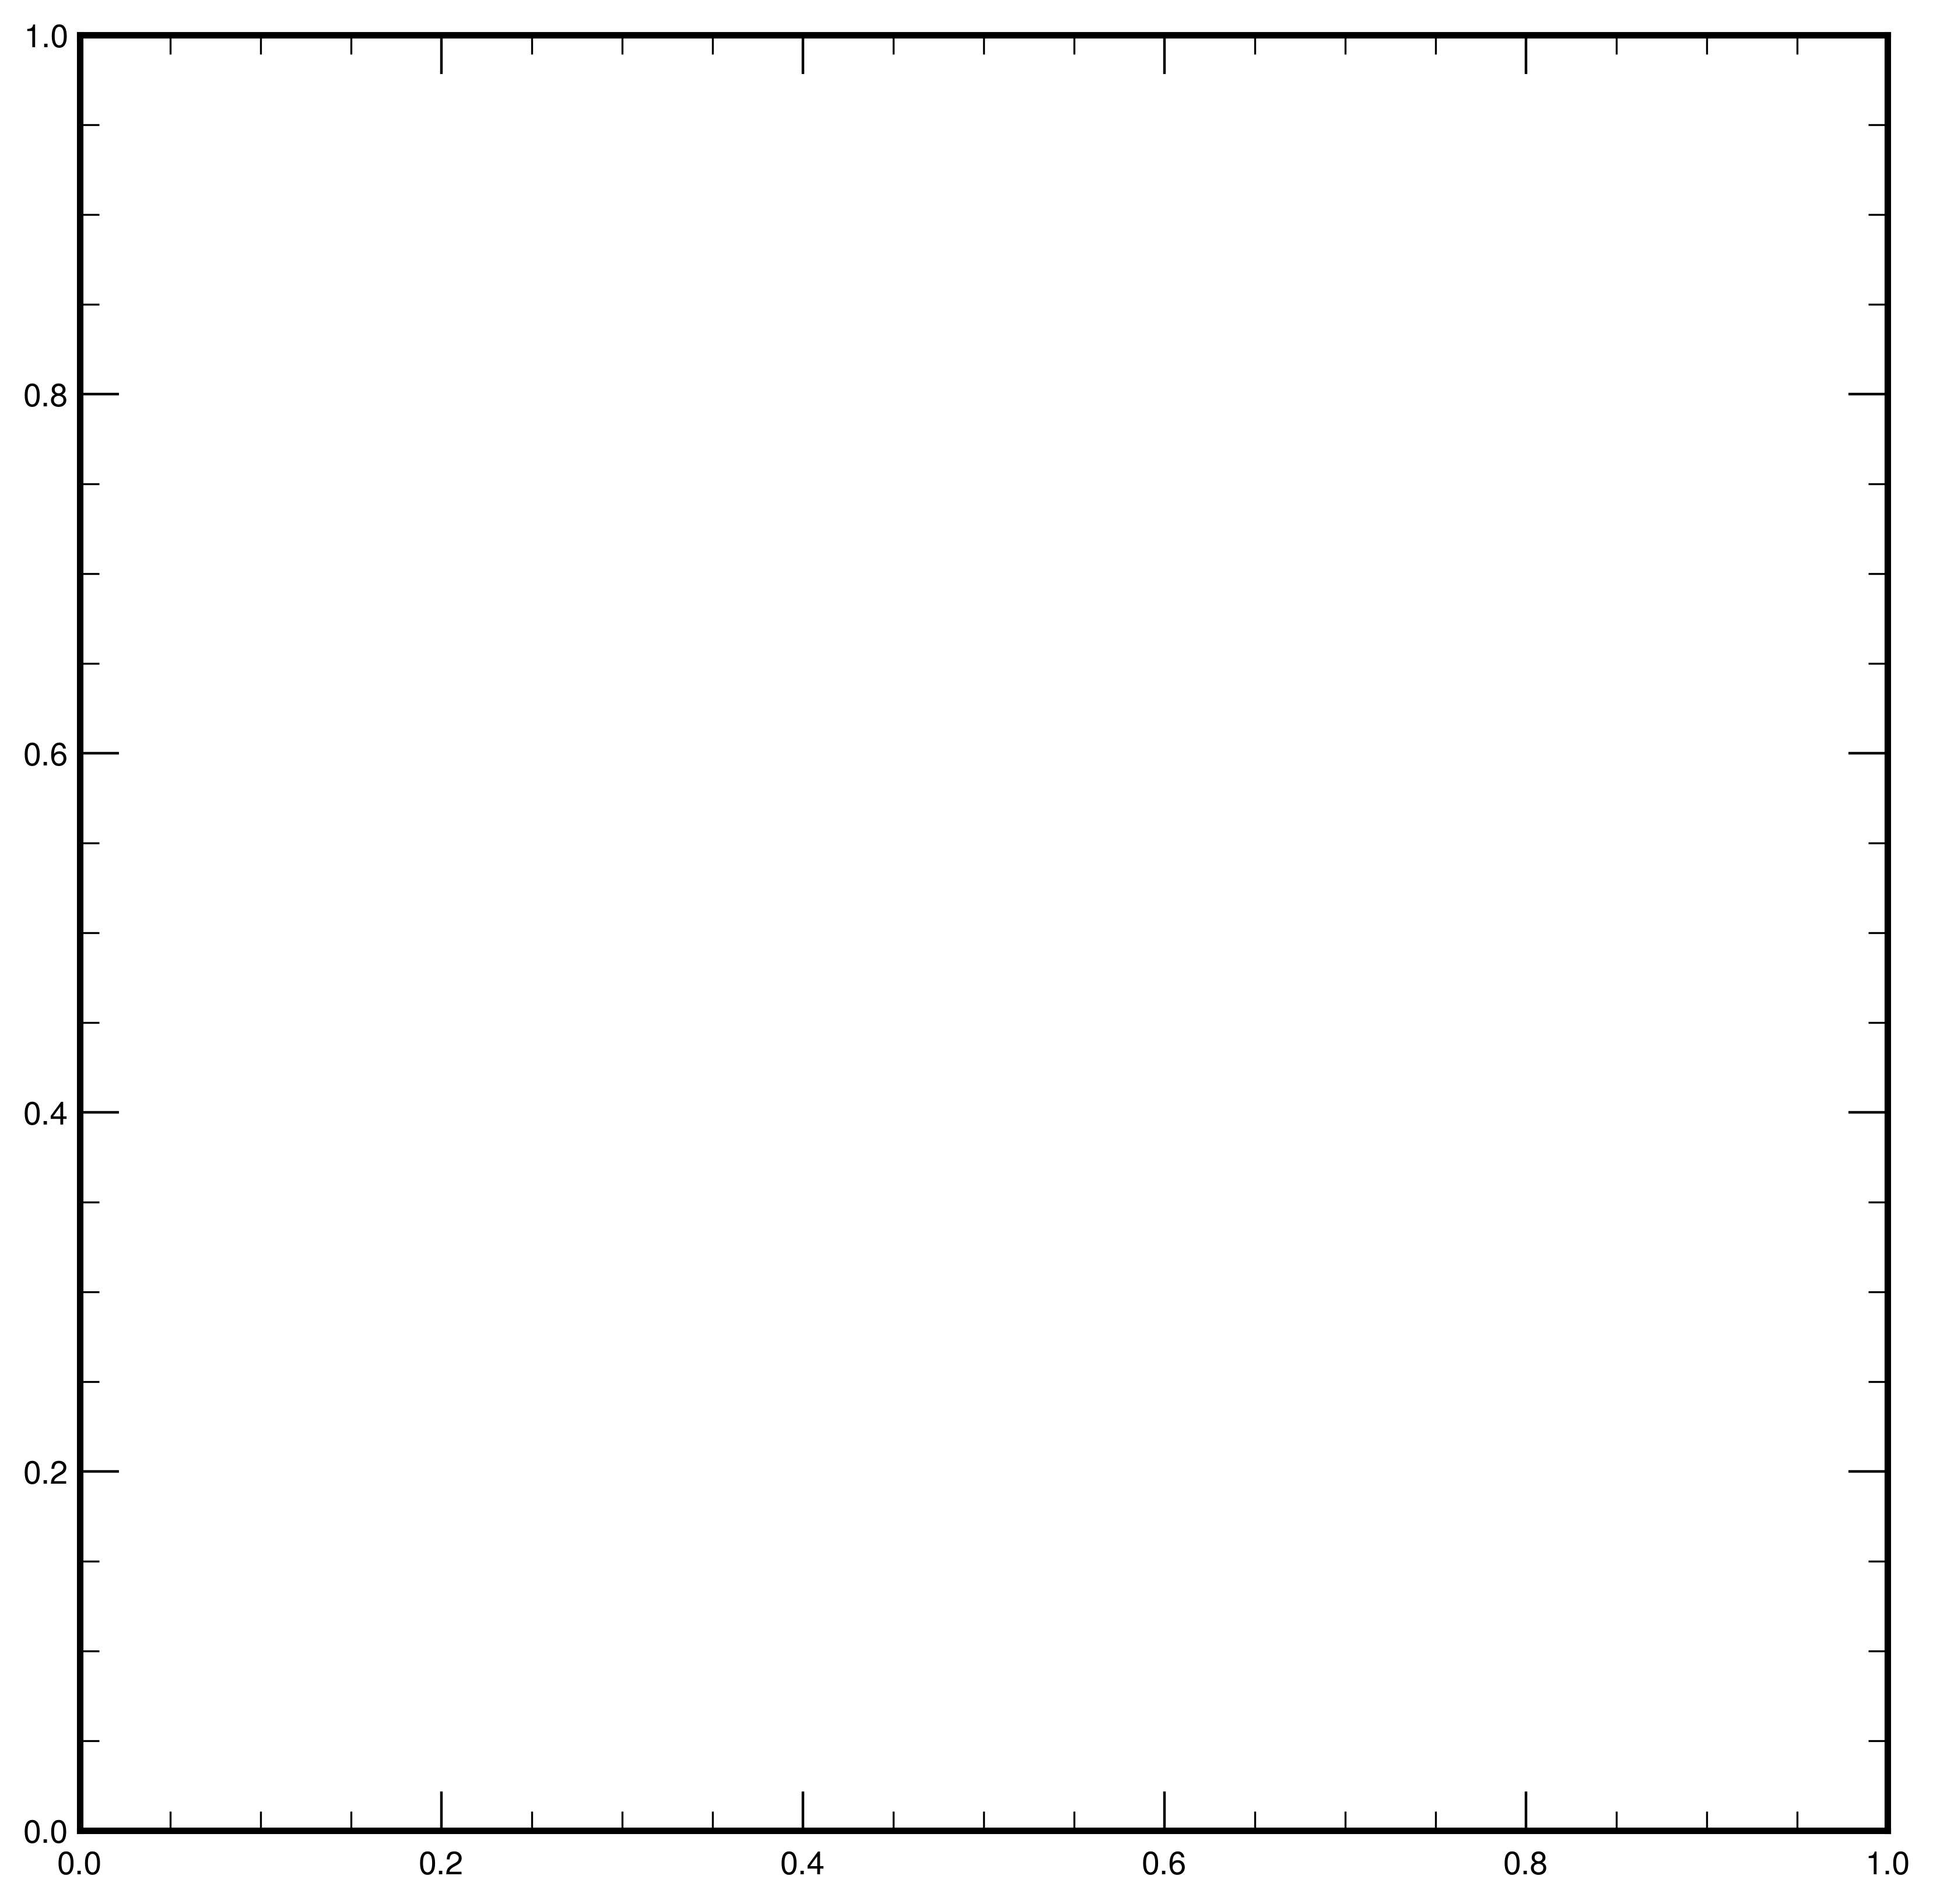

In [10]:
# thresholds on the discriminator, used to search for signal efficiency
plot_thresholds = {
    #"ParTTXbb": [0.38],
    #"ParTTW": [0.38],
}
# find what the threshold should be to achieve this signal efficiency
find_from_sigeff = {
    #"ParTTXbb": [0.71],
    #"ParTTW": [0.71],
}

plotting.multiROCCurveGrey(
    {"bb": rocs},
    # sig_effs=[0.6],
    discriminator="ParTTXbb",
    sig_effs=[],
    bkg_effs=[0.01],
    xlim=[0, 1.0],
    ylim=[1e-4, 1],
    show=True,
    plot_dir=Path(plot_dir),
    name=f"{jet_collection}{jet_coll_pnet}ROC{''.join(str(x) for x in jet_indices)}_{cut_str}_{signal}_{background}",
    title=(
        f"AK8 Jets {jet_indices}"
        if jet_collection == "ak8FatJet"
        else f"bb Jets {jet_indices}"
    ),
    legtitle=legtitle,
    plot_thresholds=plot_thresholds,
    find_from_sigeff=find_from_sigeff,
)
plt.legend(loc="upper left")

In [11]:
sc = hist.Hist.new.Reg(50, 0, 1, name="x").Double()
bk = hist.Hist.new.Reg(50, 0, 1, name="x").Double()


sig_dict = events_dict[signal][discriminator]

bk_dict = events_dict[background][discriminator]

sc.fill(x=sig_dict)
bk.fill(x=bk_dict)




Hist(Regular(50, 0, 1, name='x'), storage=Double()) # Sum: 154399025.0

Text(1, 0, 'ParTTW')

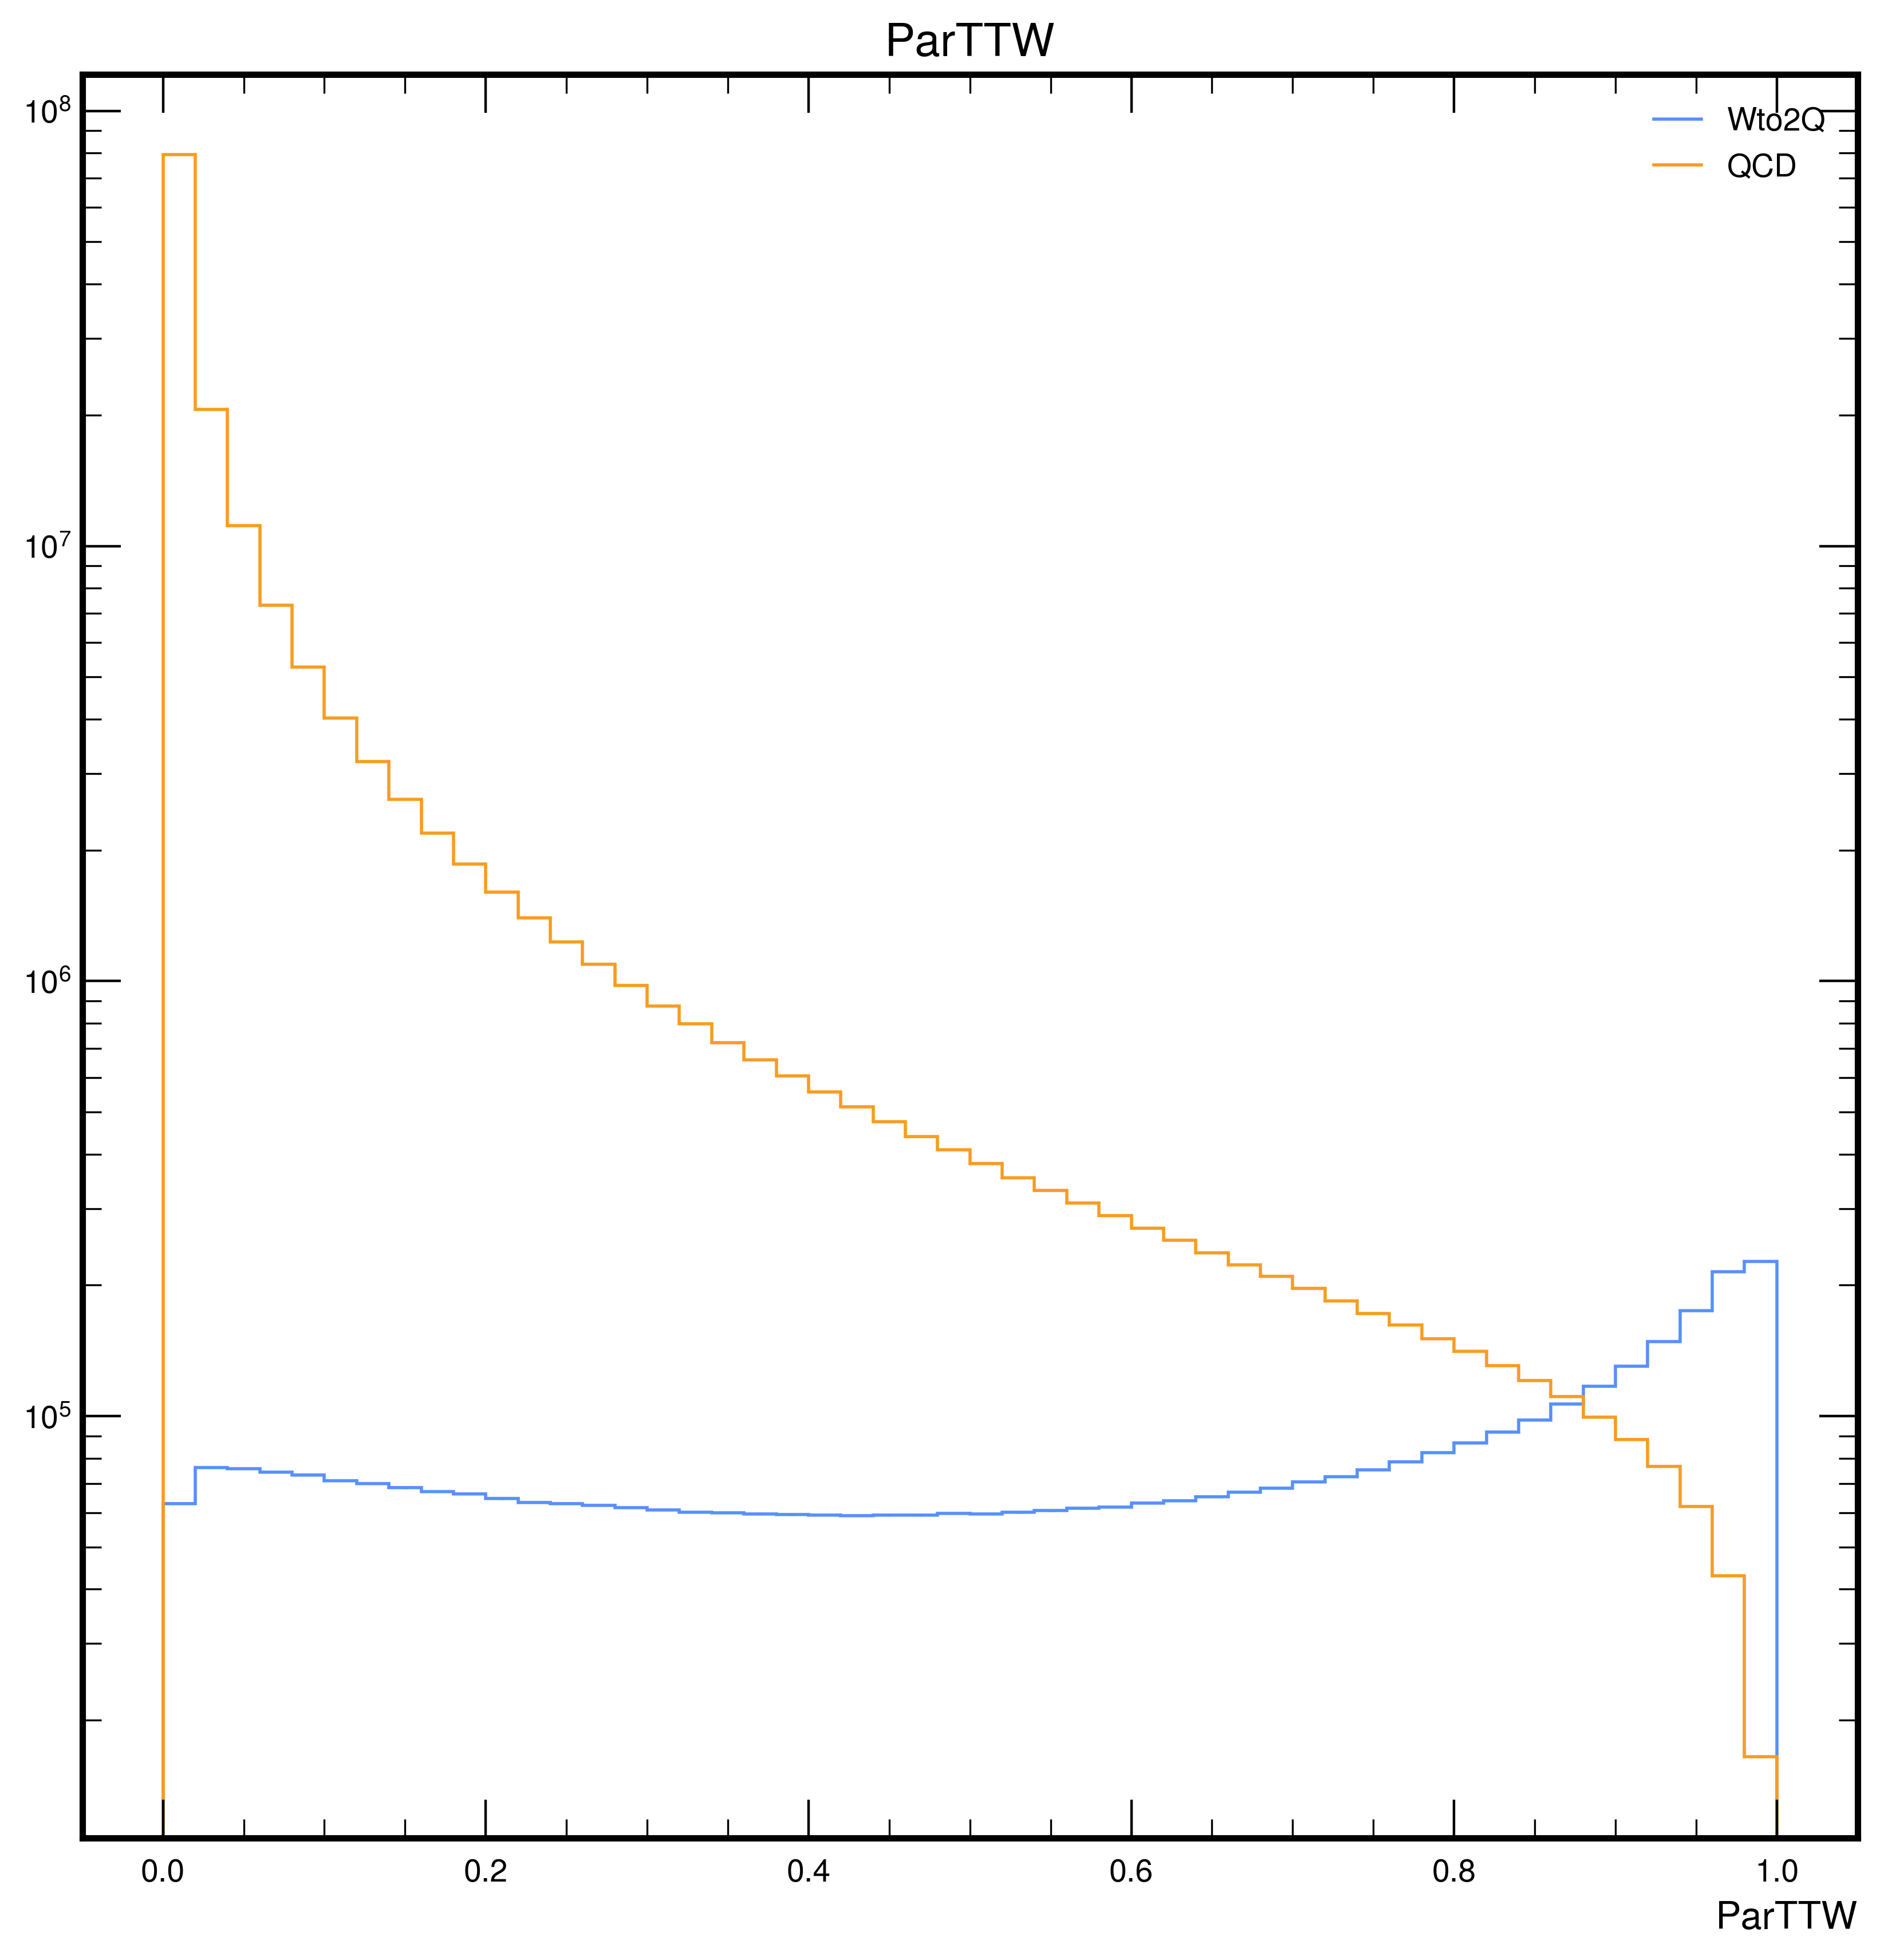

In [12]:
fig, ax = plt.subplots()
hep.histplot([sc, bk], stack=False, ax=ax, density=False)
ax.set_yscale("log")
ax.legend(["Wto2Q", "QCD"])
ax.title.set_text(discriminator_name)
ax.set_xlabel(discriminator_name)